#Traductor de Braille

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 889.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
#@title Configurando el Drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Inteligencia Artificial 2/Proyecto')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Inteligencia Artificial 2/Proyecto


In [4]:
#@title Importamos las librerías necesarias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

Este proyecto va a estar dividido en dos partes, la primera en donde se busca clasificar cada una de las letras del alfabeto Braille y la segunda en donde se planea traducir imagenes con Braille a texto.

Vamos a comenzar con la primer parte

#Clasificación de Caracteres Braille

In [ ]:
#@title Extrayendo las imagenes y sus etiquetas

ruta = "Braille Dataset"

#Inicializando X y Y
X = []
Y = []

for archivo in os.listdir(ruta):
  imagen = cv2.imread(os.path.join(ruta, archivo), cv2.IMREAD_GRAYSCALE)
  X.append(imagen)
  Y.append(archivo[0])

X = np.array(X)
Y = np.array(Y)
Y_labels = np.unique(Y)

#Necesitamos convertir las etiquetas categoricas en numericas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
print("Número de imágenes:", len(X))
print("Dimensiones de las imagenes:", X.shape[1:])
print("Cantidad de Etiquetas", len(np.unique(Y)))

Número de imágenes: 1560
Dimensiones de las imagenes: (28, 28)
Cantidad de Etiquetas 26


In [ ]:
#@title Estableciendo las porciones de entrenamiento y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [ ]:
#@title Definimos el Modelo
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), padding="same", activation='relu'))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.MaxPooling2D(2,2))
model_cnn.add(tf.keras.layers.Dropout(0.2))

model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), padding="same", activation='relu'))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.MaxPooling2D(2,2))
model_cnn.add(tf.keras.layers.Dropout(0.2))

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn.add(tf.keras.layers.Dropout(0.2))
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dropout(0.2))
model_cnn.add(tf.keras.layers.Dense(26, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,602 (861.73 KB)

 Trainable params: 220,474 (861.23 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
#@title Compilamos el modelo
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#@title Entrenamos el modelo
history_cnn = model_cnn.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.0555 - loss: 3.6639 - val_accuracy: 0.1760 - val_loss: 3.1037
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.1907 - loss: 2.7375 - val_accuracy: 0.4000 - val_loss: 2.2688
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.3620 - loss: 2.1905 - val_accuracy: 0.5240 - val_loss: 1.8115
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.5020 - loss: 1.6974 - val_accuracy: 0.6000 - val_loss: 1.5021
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5626 - loss: 1.4893 - val_accuracy: 0.6280 - val_loss: 1.4308
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.6365 - loss: 1.2653 - val_accuracy: 0.6640 - val_loss: 1.1899
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.6892 - loss: 1.0798 - val_accuracy: 0.7240 - val_loss: 1.0202
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6974 - loss: 0.9560 - val_accuracy: 0.700

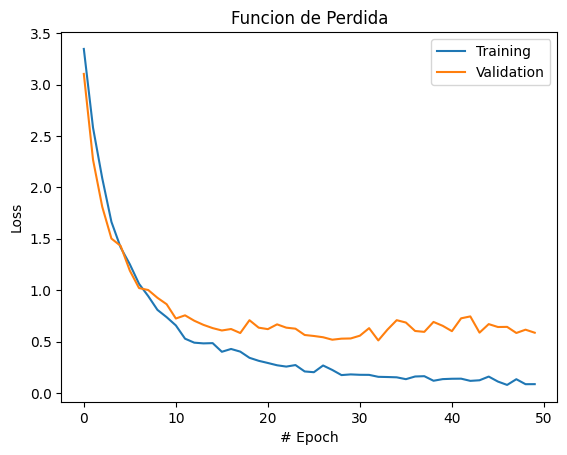

In [ ]:
#@title Ver la funcion de perdida en cada epoch
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history_cnn.history["loss"]);
plt.plot(history_cnn.history["val_loss"]);
plt.legend(["Training", "Validation"]);
plt.title("Funcion de Perdida");

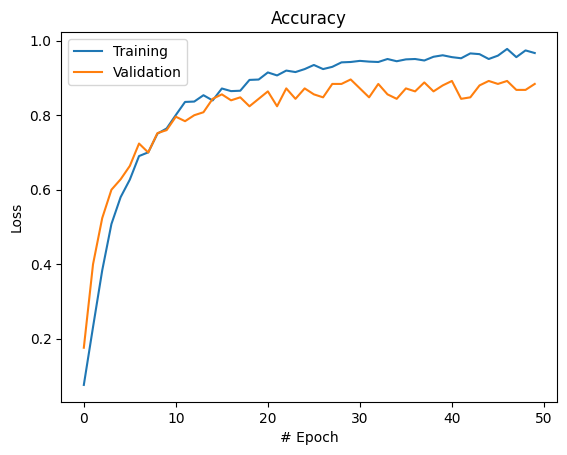

In [ ]:
#@title Ver los accuracy en cada epoch
plt.xlabel("# Epoch");
plt.ylabel("Loss");
plt.plot(history_cnn.history["accuracy"]);
plt.plot(history_cnn.history["val_accuracy"]);
plt.legend(["Training", "Validation"]);
plt.title("Accuracy");

In [ ]:
#@title Evaluamos el modelo con los datos de test
val_loss, val_acc = model_cnn.evaluate(x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8934 - loss: 0.6674


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy: 0.8782051282051282


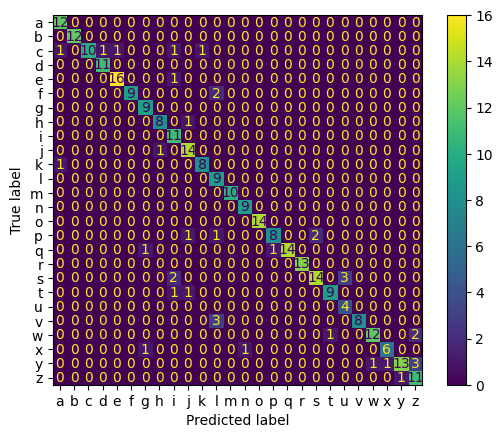

In [ ]:
#@title Evaluamos con distintas metricas
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_probs = model_cnn.predict(x_test)
y_pred = np.argmax(y_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)
cm_figure = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Y_labels)
cm_figure.plot()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
model_cnn.save('model_cnn.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Probabilidades:
	La probabilidad de que sea a es 0.0%
	La probabilidad de que sea b es 0.0%
	La probabilidad de que sea c es 0.0%
	La probabilidad de que sea d es 0.0%
	La probabilidad de que sea e es 0.0%
	La probabilidad de que sea f es 0.0%
	La probabilidad de que sea g es 0.0%
	La probabilidad de que sea h es 0.0%
	La probabilidad de que sea i es 0.0%
	La probabilidad de que sea j es 0.0%
	La probabilidad de que sea k es 0.0%
	La probabilidad de que sea l es 0.0%
	La probabilidad de que sea m es 2.0%
	La probabilidad de que sea n es 11.0%
	La probabilidad de que sea o es 0.0%
	La probabilidad de que sea p es 0.0%
	La probabilidad de que sea q es 0.0%
	La probabilidad de que sea r es 0.0%
	La probabilidad de que sea s es 0.0%
	La probabilidad de que sea t es 0.0%
	La probabilidad de que sea u es 0.0%
	La probabilidad de que sea v es 0.0%
	La probabilidad de que sea w es 10.0%
	La probabilidad de que sea x es 62.0%
	La probabilidad de que sea y 

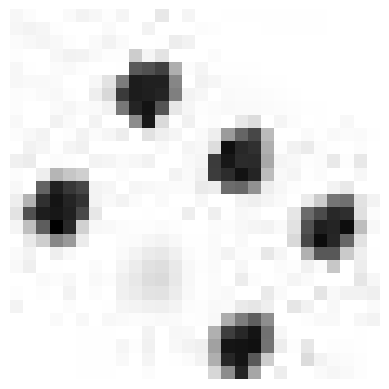

In [ ]:
#@title Mirando el resultado de una muestra
model_cnn = tf.keras.models.load_model('model_cnn.h5')

sample = x_test[np.random.randint(0,x_test.shape[0])]
sample = sample.reshape(1,28,28)
predictions = model_cnn.predict(sample)

plt.axis('off')
plt.imshow(sample[0,:,:], cmap=plt.cm.binary_r);

print('Probabilidades:')
for i in range(len(predictions[0])):
	print(f'\tLa probabilidad de que sea {Y_labels[i]} es {round(predictions[0][i],2)*100}%')

#Traducción de imagenes Braille

In [ ]:
#@title Extrayendo las imagenes y sus etiquetas

ruta_imagenes = "Imagenes/images/train"
ruta_labels = "Imagenes/labels/train"

#Inicializando X y Y
X = []
Y = []

# Ordenando los directorios, porque si no, carga las imagenes en posiciones diferentes
archivos_imagenes = sorted(os.listdir(ruta_imagenes))
archivos_labels = sorted(os.listdir(ruta_labels))

for archivo in archivos_imagenes:
  imagen = cv2.imread(os.path.join(ruta_imagenes, archivo), cv2.IMREAD_GRAYSCALE)
  X.append(imagen)

for archivo in archivos_labels:
  with open(os.path.join(ruta_labels, archivo), 'r') as f:
    Y.append(f.read())


In [ ]:
print(len(X))
print(len(Y))

1600
692


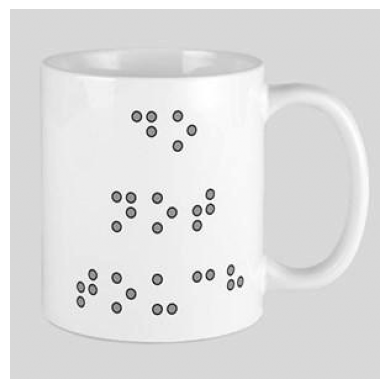

In [ ]:
plt.axis('off')
plt.imshow(X[0], cmap=plt.cm.binary_r);

In [ ]:
print(Y[0])

3
92,76,102,76,112,76,122,76,132,76,142,76,153,76,153,119,142,119,132,119,122,119,112,119,102,119,92,119,"do"
76,140,91,140,106,141,122,141,137,140,152,140,168,137,168,179,152,181,137,182,122,182,106,183,91,183,76,183,"not"
48,202,72,204,96,206,120,206,144,205,168,204,192,199,192,237,167,242,143,246,119,250,95,249,71,247,47,242,"touch"



Pero, ¿Qué significa esta serie de números?

[(92, 76), (102, 76), (112, 76), (122, 76), (132, 76), (142, 76), (153, 76), (153, 119), (142, 119), (132, 119), (122, 119), (112, 119), (102, 119), (92, 119), (76, 140), (91, 140), (106, 141), (122, 141), (137, 140), (152, 140), (168, 137), (168, 179), (152, 181), (137, 182), (122, 182), (106, 183), (91, 183), (76, 183), (48, 202), (72, 204), (96, 206), (120, 206), (144, 205), (168, 204), (192, 199), (192, 237), (167, 242), (143, 246), (119, 250), (95, 249), (71, 247), (47, 242)]


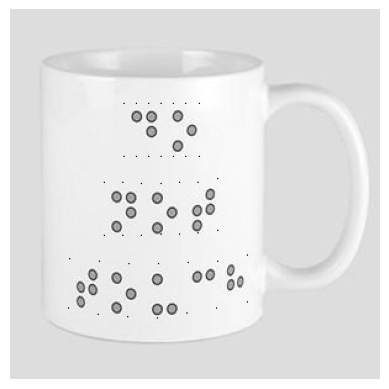

In [ ]:
imagen = X[0]
etiqueta = Y[0]

# Separando cada linea del .txt
lineas = etiqueta.strip().split("\n")
coordinates = []

for linea in lineas[1:]:
    parts = linea.strip().split(",")
    coords = [(int(parts[i]), int(parts[i + 1])) for i in range(0, len(parts)-1, 2)]
    coordinates.extend(coords)

print(coordinates)

imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
for coords in coordinates:
    imagen_color[coords[1], coords[0]] = (0, 0, 0) # Dibujamos los puntos en la imagen

# Mostrar la imagen con los puntos
plt.imshow(imagen_color)
plt.axis('off')
plt.show()

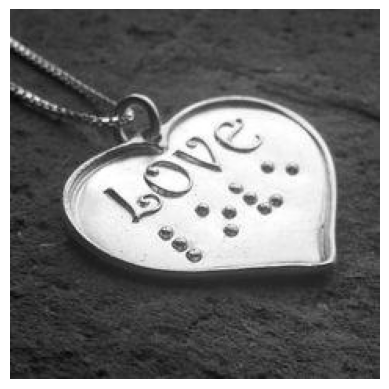

In [ ]:
plt.axis('off')
plt.imshow(X[2], cmap=plt.cm.binary_r);

In [ ]:
print(Y[2])

1
86,142,100,131,115,121,130,111,144,101,159,91,174,81,199,106,184,116,170,126,156,136,141,146,127,156,113,166,"love"



[(86, 142), (100, 131), (115, 121), (130, 111), (144, 101), (159, 91), (174, 81), (199, 106), (184, 116), (170, 126), (156, 136), (141, 146), (127, 156), (113, 166)]


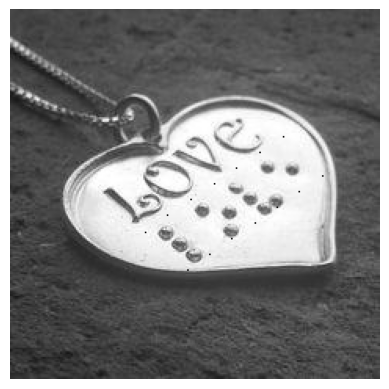

In [ ]:
image = X[2]
label = Y[2]

# Separando cada linea del .txt
lineas = label.strip().split("\n")
coordinates = []

for linea in lineas[1:]:
    parts = linea.strip().split(",")
    coords = [(int(parts[i]), int(parts[i + 1])) for i in range(0, len(parts)-1, 2)]
    coordinates.extend(coords)

print(coordinates)

imagen_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for coords in coordinates:
    imagen_color[coords[1], coords[0]] = (0, 0, 0) # Dibujamos los puntos en la imagen

# Mostrar la imagen con los puntos
plt.imshow(imagen_color)
plt.axis('off')
plt.show()

Al ver esto, empezé a etiquetas algunas de las imagenes a mano para poder entrenar un modelo de detección, además de que purgue el dataset y omití las imagenes con braille que estuviera inclinado o rotado como la imagen del collar de corazón que dice "love", las bounding boxes inclurían relieves de otras letras, lo que haría más dificil la tarea de deteccion y clasificación.

In [ ]:
import shutil

ruta_dataset_labels_train = 'Braille Images/Train/Labels'
ruta_dataset_labels_test = 'Braille Images/Test/Labels'
ruta_dataset_imagenes_train = 'Braille Images/Train/Images'
ruta_dataset_imagenes_test = 'Braille Images/Test/Images'
ruta_imagenes_train = "Imagenes/images/train"
ruta_imagenes_test = "Imagenes/images/val"

# Obtener todos los nombres base de los labels (sin extensión)
labels_train = {os.path.splitext(f)[0] for f in os.listdir(ruta_dataset_labels_train) if f.endswith('.txt')}
labels_test = {os.path.splitext(f)[0] for f in os.listdir(ruta_dataset_labels_test) if f.endswith('.txt')}

# Recorremos las imágenes y seleccionamos las que tengan label correspondiente
for imagen in os.listdir(ruta_imagenes_train):
    nombre_base, ext = os.path.splitext(imagen)
    if nombre_base in labels_train:
        ruta_origen = os.path.join(ruta_imagenes_train, imagen)
        ruta_destino = os.path.join(ruta_dataset_imagenes_train, imagen)
        shutil.copy2(ruta_origen, ruta_destino)

# Recorremos las imágenes y seleccionamos las que tengan label correspondiente
for imagen in os.listdir(ruta_imagenes_test):
    nombre_base, ext = os.path.splitext(imagen)
    if nombre_base in labels_test:
        ruta_origen = os.path.join(ruta_imagenes_test, imagen)
        ruta_destino = os.path.join(ruta_dataset_imagenes_test, imagen)
        shutil.copy2(ruta_origen, ruta_destino)

In [ ]:
import tensorflow as tf
import numpy as np
import os

def load_and_save_image_and_labels(img_path, label_path,
                                   target_size=(512, 512),
                                   save_img_dir="resized/images",
                                   save_lbl_dir="resized/labels"):
    # Crear carpetas de destino si no existen
    os.makedirs(save_img_dir, exist_ok=True)
    os.makedirs(save_lbl_dir, exist_ok=True)

    # Leer imagen en escala de grises
    image_raw = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image_raw, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)

    orig_h = tf.cast(tf.shape(image)[0], tf.float32)
    orig_w = tf.cast(tf.shape(image)[1], tf.float32)

    # Leer etiquetas
    labels = np.loadtxt(label_path, dtype=np.float32)
    if labels.ndim == 1:
        labels = np.expand_dims(labels, axis=0)

    class_ids = labels[:, 0]
    x_center = labels[:, 1] * orig_w
    y_center = labels[:, 2] * orig_h
    width = labels[:, 3] * orig_w
    height = labels[:, 4] * orig_h

    # Convertir a (xmin, ymin, xmax, ymax)
    xmin = x_center - width / 2
    ymin = y_center - height / 2
    xmax = x_center + width / 2
    ymax = y_center + height / 2
    boxes = tf.stack([xmin, ymin, xmax, ymax], axis=1)

    # Resize con padding
    target_h, target_w = target_size
    scale = tf.minimum(target_w / orig_w, target_h / orig_h)
    new_w = orig_w * scale
    new_h = orig_h * scale
    dx = (target_w - new_w) / 2
    dy = (target_h - new_h) / 2

    resized_image = tf.image.resize_with_pad(image, target_h, target_w)

    # Ajustar cajas
    xmin = boxes[:, 0] * scale + dx
    ymin = boxes[:, 1] * scale + dy
    xmax = boxes[:, 2] * scale + dx
    ymax = boxes[:, 3] * scale + dy

    new_x_center = (xmin + xmax) / 2
    new_y_center = (ymin + ymax) / 2
    new_width = xmax - xmin
    new_height = ymax - ymin

    new_labels = np.stack([
        class_ids,
        new_x_center / target_w,
        new_y_center / target_h,
        new_width / target_w,
        new_height / target_h
    ], axis=1)

    # Obtener nombre base (sin carpeta)
    base_name = os.path.splitext(os.path.basename(img_path))[0]

    # Guardar imagen como JPG en 3 canales (conversión necesaria)
    rgb_image = tf.image.grayscale_to_rgb(resized_image)
    img_uint8 = tf.image.convert_image_dtype(rgb_image, tf.uint8)
    encoded_img = tf.io.encode_jpeg(img_uint8)
    tf.io.write_file(os.path.join(save_img_dir, base_name + ".jpg"), encoded_img)

    # Guardar etiquetas como .txt
    np.savetxt(os.path.join(save_lbl_dir, base_name + ".txt"), new_labels, fmt="%.6f")

    return resized_image, new_labels

In [ ]:
import os
import glob
from tqdm import tqdm

def process_dataset(
    image_dir,
    label_dir,
    save_img_dir,
    save_lbl_dir,
    target_size=(640, 640)
):
    # Obtener lista de imágenes JPG/PNG
    img_paths = sorted(glob.glob(os.path.join(image_dir, "*.[jp][pn]g")))

    print(f"Procesando {len(img_paths)} imágenes...")

    for img_path in tqdm(img_paths):
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(label_dir, base_name + ".txt")

        if not os.path.exists(label_path):
            print(f"Etiqueta no encontrada para {img_path}, se omite.")
            continue

        try:
            load_and_save_image_and_labels(
                img_path, label_path,
                target_size=target_size,
                save_img_dir=save_img_dir,
                save_lbl_dir=save_lbl_dir
            )
        except Exception as e:
            print(f"Error procesando {img_path}: {e}")

In [ ]:
ruta_dataset_labels_train = 'Braille Images/Train/Labels'
ruta_dataset_labels_test = 'Braille Images/Test/Labels'
ruta_dataset_imagenes_train = 'Braille Images/Train/Images'
ruta_dataset_imagenes_test = 'Braille Images/Test/Images'

#----------------------------------------------------------
ruta_labels_train_processed = 'Braille Images/Processed/labels/train'
ruta_labels_test_processed = 'Braille Images/Processed/labels/test'
ruta_images_train_processed = 'Braille Images/Processed/images/train'
ruta_images_test_processed = 'Braille Images/Processed/images/test'

process_dataset(ruta_dataset_imagenes_train, ruta_dataset_labels_train, ruta_images_train_processed, ruta_labels_train_processed)
process_dataset(ruta_dataset_imagenes_test, ruta_dataset_labels_test, ruta_images_test_processed, ruta_labels_test_processed)

Procesando 133 imágenes...


100%|██████████| 133/133 [01:08<00:00,  1.94it/s]


Procesando 60 imágenes...


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


Intento con un dataset de juguete

In [ ]:
!pip install pillow

Tamaño de fuente: 40px
Palabra original: 'zebra' → Palabra Braille: '⠵⠑⠃⠗⠁'
Letra 'z' → Braille '⠵'
  Bounding Box (YOLO): x_center=0.0590, y_center=0.3440, width=0.0780, height=0.1000
Letra 'e' → Braille '⠑'
  Bounding Box (YOLO): x_center=0.1370, y_center=0.3440, width=0.0780, height=0.1000
Letra 'b' → Braille '⠃'
  Bounding Box (YOLO): x_center=0.2150, y_center=0.3440, width=0.0780, height=0.1000
Letra 'r' → Braille '⠗'
  Bounding Box (YOLO): x_center=0.2930, y_center=0.3440, width=0.0780, height=0.1000
Letra 'a' → Braille '⠁'
  Bounding Box (YOLO): x_center=0.3710, y_center=0.3440, width=0.0780, height=0.1000


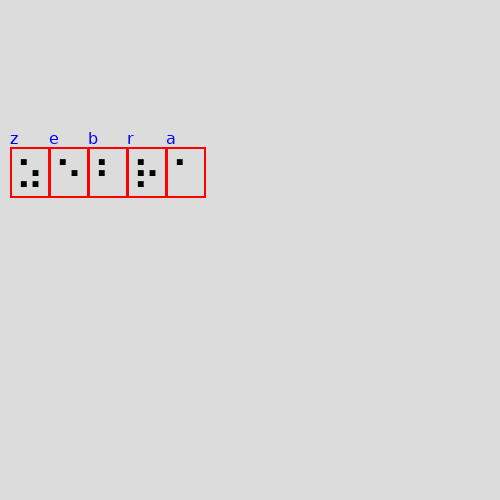

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random
from IPython.display import display

def generar_braille_con_bounding_por_letra(ancho=500, alto=500, margen=10, espacio=10):
    # Elegir un tamaño de fuente aleatorio pero legible
    tamaño_fuente = random.randint(20, 80)
    tamaño_etiqueta = int(tamaño_fuente * 0.4)

    imagen = Image.new("RGB", (ancho, alto), color=(220, 220, 220))
    draw = ImageDraw.Draw(imagen)

    ruta_fuente = "DejaVuSans.ttf"
    try:
        fuente = ImageFont.truetype(ruta_fuente, tamaño_fuente)
        fuente_etiqueta = ImageFont.truetype(ruta_fuente, tamaño_etiqueta)
    except IOError:
        raise Exception(f"No se pudo cargar la fuente '{ruta_fuente}'.")

    lista_palabras = [
        "apple", "banana", "zebra", "quiz", "vex", "jump", "fuzzy", "brick", "knight", "oxygen",
        "wave", "xylophone", "quest", "jungle", "vivid", "drizzle", "blaze", "sphinx", "index", "quake",
        "flame", "bright", "honey", "sword", "mountain", "dream", "plant", "bread", "cloud", "train",
        "charm", "grape", "sketch", "elbow", "tiger", "chess", "whale", "robot", "puzzle", "gleam",
        "snake", "whisk", "marble", "ignite", "candle", "lizard", "echo", "forest", "castle", "bluff",
        "noble", "fraud", "anchor", "track", "ocean", "lemon", "sharp", "giant", "maze", "witch",
        "freeze", "glide", "orbit", "whisker", "bullet", "yarn", "hazard", "icicle", "quilt", "vault",
        "jumble", "spike", "narrow", "flick", "breeze", "quiver", "boxer", "guitar", "jeans", "zipper",
        "snack", "fjord", "glisten", "prism", "rumble", "turbo", "canvas", "dwarf", "vortex", "zenith",
        "nymph", "toxic", "splash", "unlock", "prompt", "drift", "questor", "jigsaw", "wrench", "fable"
    ]

    braille_map = {
        'a': '\u2801', 'b': '\u2803', 'c': '\u2809', 'd': '\u2819', 'e': '\u2811',
        'f': '\u280B', 'g': '\u281B', 'h': '\u2813', 'i': '\u280A', 'j': '\u281A',
        'k': '\u2805', 'l': '\u2807', 'm': '\u280D', 'n': '\u281D', 'o': '\u2815',
        'p': '\u280F', 'q': '\u281F', 'r': '\u2817', 's': '\u280E', 't': '\u281E',
        'u': '\u2825', 'v': '\u2827', 'w': '\u283A', 'x': '\u282D', 'y': '\u283D', 'z': '\u2835'
    }

    palabra = random.choice(lista_palabras)
    palabra_braille = ''.join(braille_map[letra] for letra in palabra)

    # Calcular el ancho total de la palabra en braille
    total_width = 0
    char_widths = []
    for braille_char in palabra_braille:
        bbox = fuente.getbbox(braille_char)
        w = bbox[2] - bbox[0]
        char_widths.append(w)
        total_width += w + espacio
    total_width -= espacio

    # Calcular posición aleatoria donde quepa la palabra
    x_start = random.randint(margen, max(margen, ancho - total_width - margen))
    y_start = random.randint(margen + tamaño_etiqueta + 5, max(margen, alto - tamaño_fuente - tamaño_etiqueta - margen))

    print(f"Tamaño de fuente: {tamaño_fuente}px")
    print(f"Palabra original: '{palabra}' → Palabra Braille: '{palabra_braille}'")

    x = x_start
    for i, (letra, braille_char) in enumerate(zip(palabra, palabra_braille)):
        w = char_widths[i]
        h = tamaño_fuente

        draw.text((x, y_start), braille_char, font=fuente, fill=(0, 0, 0))

        x_min = x - 5
        y_min = y_start - 5
        x_max = x + w + 5
        y_max = y_start + h + 5
        draw.rectangle([x_min, y_min, x_max, y_max], outline=(255, 0, 0), width=2)

        draw.text((x_min, y_min - tamaño_etiqueta - 2), letra, fill=(0, 0, 255), font=fuente_etiqueta)

        x_center = (x_min + x_max) / 2 / ancho
        y_center = (y_min + y_max) / 2 / alto
        bbox_w = (x_max - x_min) / ancho
        bbox_h = (y_max - y_min) / alto

        print(f"Letra '{letra}' → Braille '{braille_char}'")
        print(f"  Bounding Box (YOLO): x_center={x_center:.4f}, y_center={y_center:.4f}, width={bbox_w:.4f}, height={bbox_h:.4f}")

        x += w + espacio

    display(imagen)

# Ejecutar
generar_braille_con_bounding_por_letra()

Intento con una YOLO pre-entrenada de ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv5n model
model = YOLO("yolov5n.pt")

# Display model information (optional)
model.info()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

YOLOv5n summary: 153 layers, 2,654,816 parameters, 0 gradients, 7.8 GFLOPs


(153, 2654816, 0, 7.840102399999999)

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import random
import tensorflow as tf
import numpy as np

def generar_braille_dataset_sintetico_y_guardar(cantidad=1, ancho=500, alto=500, margen=10, espacio=10,
                                                tamaño_salida=(512,512),
                                                output_images_dir="images",
                                                output_labels_dir="labels"):
    os.makedirs(output_images_dir, exist_ok=True)
    os.makedirs(output_labels_dir, exist_ok=True)

    ruta_fuente = "DejaVuSans.ttf"
    try:
        fuente = ImageFont.truetype(ruta_fuente, size=40)
        fuente_etiqueta = ImageFont.truetype(ruta_fuente, size=16)
    except IOError:
        raise Exception(f"No se pudo cargar la fuente '{ruta_fuente}'.")

    lista_palabras = [
        "apple", "banana", "zebra", "quiz", "vex", "jump", "fuzzy", "brick", "knight", "oxygen",
        "wave", "xylophone", "quest", "jungle", "vivid", "drizzle", "blaze", "sphinx", "index", "quake",
        "flame", "bright", "honey", "sword", "mountain", "dream", "plant", "bread", "cloud", "train",
        "charm", "grape", "sketch", "elbow", "tiger", "chess", "whale", "robot", "puzzle", "gleam",
        "snake", "whisk", "marble", "ignite", "candle", "lizard", "echo", "forest", "castle", "bluff",
        "noble", "fraud", "anchor", "track", "ocean", "lemon", "sharp", "giant", "maze", "witch",
        "freeze", "glide", "orbit", "whisker", "bullet", "yarn", "hazard", "icicle", "quilt", "vault",
        "jumble", "spike", "narrow", "flick", "breeze", "quiver", "boxer", "guitar", "jeans", "zipper",
        "snack", "fjord", "glisten", "prism", "rumble", "turbo", "canvas", "dwarf", "vortex", "zenith",
        "nymph", "toxic", "splash", "unlock", "prompt", "drift", "questor", "jigsaw", "wrench", "fable"
    ]

    braille_map = {
        'a': '\u2801', 'b': '\u2803', 'c': '\u2809', 'd': '\u2819', 'e': '\u2811',
        'f': '\u280B', 'g': '\u281B', 'h': '\u2813', 'i': '\u280A', 'j': '\u281A',
        'k': '\u2805', 'l': '\u2807', 'm': '\u280D', 'n': '\u281D', 'o': '\u2815',
        'p': '\u280F', 'q': '\u281F', 'r': '\u2817', 's': '\u280E', 't': '\u281E',
        'u': '\u2825', 'v': '\u2827', 'w': '\u283A', 'x': '\u282D', 'y': '\u283D', 'z': '\u2835'
    }

    for idx in range(cantidad):
        imagen = Image.new("RGB", (ancho, alto), color=(220, 220, 220))
        draw = ImageDraw.Draw(imagen)

        palabra = random.choice(lista_palabras)
        palabra_braille = ''.join(braille_map[letra] for letra in palabra)

        total_width = 0
        char_widths = []
        for braille_char in palabra_braille:
            bbox = fuente.getbbox(braille_char)
            w = bbox[2] - bbox[0]
            char_widths.append(w)
            total_width += w + espacio
        total_width -= espacio

        x_start = random.randint(margen, max(margen, ancho - total_width - margen))
        y_start = random.randint(margen + 20, max(margen, alto - 40 - 20 - margen))

        x = x_start
        boxes = []

        for i, (letra, braille_char) in enumerate(zip(palabra, palabra_braille)):
            w = char_widths[i]
            h = 40  # tamaño de la fuente

            draw.text((x, y_start), braille_char, font=fuente, fill=(0, 0, 0))

            x_min = x - 5
            y_min = y_start - 5
            x_max = x + w + 5
            y_max = y_start + h + 5

            clase = ord(letra.lower()) - ord('a')

            # Bounding box en formato YOLO normalizado
            x_center = (x_min + x_max) / 2 / ancho
            y_center = (y_min + y_max) / 2 / alto
            bbox_w = (x_max - x_min) / ancho
            bbox_h = (y_max - y_min) / alto

            boxes.append([clase, x_center, y_center, bbox_w, bbox_h])
            x += w + espacio

        # Resize imagen para guardar
        imagen_resized = imagen.resize(tamaño_salida).convert("L")

        # Guardar imagen y etiqueta
        filename = f"img_{idx:05d}"
        path_img = os.path.join(output_images_dir, f"{filename}.jpg")
        path_lbl = os.path.join(output_labels_dir, f"{filename}.txt")

        imagen_resized.save(path_img)

        with open(path_lbl, 'w') as f:
            for box in boxes:
                f.write(" ".join(f"{x:.6f}" for x in box) + "\n")

In [ ]:
%cd '/content/drive/MyDrive/Inteligencia Artificial 2/Proyecto'
print(os.getcwd())

/content
/content/drive/MyDrive/Inteligencia Artificial 2/Proyecto


In [ ]:
generar_braille_dataset_sintetico_y_guardar(cantidad=1500,
                                            output_images_dir='Braille Syntetic/images/train',
                                            output_labels_dir='Braille Syntetic/labels/train')

generar_braille_dataset_sintetico_y_guardar(cantidad=500,
                                            output_images_dir='Braille Syntetic/images/test',
                                            output_labels_dir='Braille Syntetic/labels/test')

generar_braille_dataset_sintetico_y_guardar(cantidad=500,
                                            output_images_dir='Braille Syntetic/images/val',
                                            output_labels_dir='Braille Syntetic/labels/val')

In [ ]:
import torch
print(torch.cuda.is_available())  # Debe devolver True

True


In [ ]:
model.train(data="braille.yaml", epochs=50, imgsz=512, batch=32)

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=braille.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

train: Scanning /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Syntetic/labels/train... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:22<00:00, 67.91it/s] 


train: New cache created: /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Syntetic/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 7.0±5.3 ms, read: 0.7±0.6 MB/s, size: 4.4 KB)


val: Scanning /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Syntetic/labels/val... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:06<00:00, 74.21it/s] 


val: New cache created: /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Syntetic/labels/val.cache
Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.75G       2.49      4.642      1.597        201        512: 100%|██████████| 47/47 [00:23<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        500       2697     0.0328       0.54      0.045     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.28G      1.093      2.942     0.9361        196        512: 100%|██████████| 47/47 [00:20<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        500       2697     0.0301      0.994      0.139       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.29G     0.8745      2.492        0.9        231        512: 100%|██████████| 47/47 [00:21<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        500       2697      0.573      0.313      0.404      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       3.3G     0.7527       2.06     0.8741        187        512: 100%|██████████| 47/47 [00:21<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all        500       2697      0.609      0.618       0.65      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.32G     0.6726      1.668     0.8572        183        512: 100%|██████████| 47/47 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        500       2697      0.643      0.783      0.792      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.33G     0.6031      1.369     0.8434        235        512: 100%|██████████| 47/47 [00:20<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]

                   all        500       2697      0.795      0.872      0.858      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.35G     0.5716      1.205      0.836        226        512: 100%|██████████| 47/47 [00:20<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        500       2697      0.828      0.899      0.873      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.36G     0.5495      1.108     0.8343        224        512: 100%|██████████| 47/47 [00:19<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]

                   all        500       2697      0.843      0.927      0.895      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.38G     0.4878      1.011     0.8198        230        512: 100%|██████████| 47/47 [00:20<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]

                   all        500       2697      0.842      0.926       0.89      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.39G     0.4832     0.9795       0.82        221        512: 100%|██████████| 47/47 [00:20<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all        500       2697      0.858      0.944      0.901      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       3.4G     0.5047     0.9195     0.8223        268        512: 100%|██████████| 47/47 [00:21<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]

                   all        500       2697      0.865      0.945      0.923       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.42G     0.4719     0.8792     0.8204        221        512: 100%|██████████| 47/47 [00:20<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        500       2697      0.878      0.953      0.919      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.43G     0.4306      0.848     0.8121        210        512: 100%|██████████| 47/47 [00:19<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        500       2697      0.888      0.949       0.94      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.45G     0.4167     0.8228     0.8107        222        512: 100%|██████████| 47/47 [00:20<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.33it/s]

                   all        500       2697      0.883      0.956      0.938      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.46G     0.4201     0.8105     0.8087        252        512: 100%|██████████| 47/47 [00:19<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        500       2697      0.888      0.958      0.937      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.47G     0.4186     0.7883     0.8093        188        512: 100%|██████████| 47/47 [00:21<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]

                   all        500       2697        0.9      0.954      0.946      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.49G     0.3958     0.7545     0.8034        235        512: 100%|██████████| 47/47 [00:22<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]

                   all        500       2697      0.915      0.965      0.957      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       3.5G     0.3834     0.7551     0.8078        236        512: 100%|██████████| 47/47 [00:22<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        500       2697       0.92      0.955      0.961      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.52G     0.3764     0.7322     0.8055        205        512: 100%|██████████| 47/47 [00:23<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        500       2697      0.914      0.959      0.963      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.53G     0.3612     0.7126     0.8036        236        512: 100%|██████████| 47/47 [00:24<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        500       2697      0.928      0.967       0.97      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.55G     0.3509     0.7051     0.8061        234        512: 100%|██████████| 47/47 [00:22<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]

                   all        500       2697      0.935      0.963      0.969      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.56G     0.3395       0.68     0.7986        190        512: 100%|██████████| 47/47 [00:22<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        500       2697      0.933      0.958      0.969      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.57G     0.3494     0.6607     0.7998        249        512: 100%|██████████| 47/47 [00:20<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        500       2697      0.963      0.951      0.978      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.59G     0.3193     0.6481     0.7969        218        512: 100%|██████████| 47/47 [00:20<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        500       2697      0.946      0.961      0.975       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.6G     0.3204     0.6346     0.8001        226        512: 100%|██████████| 47/47 [00:21<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        500       2697      0.967      0.965       0.98      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.62G     0.3172     0.6232     0.7973        215        512: 100%|██████████| 47/47 [00:21<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        500       2697      0.972       0.96      0.982      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.63G     0.3076     0.6189     0.7957        221        512: 100%|██████████| 47/47 [00:21<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        500       2697      0.967      0.964      0.984      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.65G      0.302     0.6145     0.7957        227        512: 100%|██████████| 47/47 [00:20<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        500       2697      0.976      0.966      0.985      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.66G     0.3064     0.6091     0.7992        263        512: 100%|██████████| 47/47 [00:21<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]

                   all        500       2697      0.953      0.964      0.977      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.68G     0.2919     0.5952     0.7943        224        512: 100%|██████████| 47/47 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        500       2697      0.974      0.965      0.986      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.69G     0.2995     0.5945     0.7951        235        512: 100%|██████████| 47/47 [00:22<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all        500       2697      0.979      0.961      0.986      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.7G      0.287     0.5731     0.7961        224        512: 100%|██████████| 47/47 [00:23<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all        500       2697      0.983      0.972      0.989      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.72G     0.2815     0.5631     0.7926        248        512: 100%|██████████| 47/47 [00:22<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all        500       2697      0.985      0.965      0.989      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.73G     0.2874     0.5574     0.7925        198        512: 100%|██████████| 47/47 [00:24<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]

                   all        500       2697      0.976      0.972      0.988      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.75G     0.2845     0.5565     0.7931        230        512: 100%|██████████| 47/47 [00:22<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        500       2697      0.982       0.97      0.988      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.76G     0.2752     0.5482     0.7925        161        512: 100%|██████████| 47/47 [00:22<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        500       2697      0.982      0.976      0.988      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.78G      0.279     0.5556     0.7933        256        512: 100%|██████████| 47/47 [00:22<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        500       2697      0.984       0.98       0.99      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.79G     0.2714       0.54      0.794        178        512: 100%|██████████| 47/47 [00:21<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]

                   all        500       2697      0.981      0.974      0.988      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       3.8G     0.2817     0.5467     0.7924        188        512: 100%|██████████| 47/47 [00:21<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        500       2697      0.982      0.976      0.991       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.82G     0.2633     0.5349     0.7942        222        512: 100%|██████████| 47/47 [00:19<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        500       2697      0.986      0.974       0.99      0.988


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.83G     0.2982      0.479     0.7877        146        512: 100%|██████████| 47/47 [00:22<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        500       2697      0.973      0.985      0.992      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.85G     0.2013       0.42     0.7718        153        512: 100%|██████████| 47/47 [00:20<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        500       2697      0.986       0.98      0.992      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.86G     0.1969     0.4148     0.7796        151        512: 100%|██████████| 47/47 [00:21<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        500       2697      0.988      0.988      0.993      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.88G     0.1889       0.41     0.7809        139        512: 100%|██████████| 47/47 [00:20<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all        500       2697      0.982      0.988      0.993      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.89G     0.1888     0.4042     0.7768        143        512: 100%|██████████| 47/47 [00:21<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]

                   all        500       2697      0.983      0.981      0.991      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.9G     0.1841     0.3999     0.7786        145        512: 100%|██████████| 47/47 [00:21<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        500       2697      0.987      0.983      0.992      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.92G     0.1822     0.3982      0.779        143        512: 100%|██████████| 47/47 [00:21<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]

                   all        500       2697      0.988      0.986      0.991      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.93G     0.1756     0.3841     0.7723        144        512: 100%|██████████| 47/47 [00:19<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        500       2697      0.988      0.987      0.993      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.95G     0.1739     0.3789     0.7783        140        512: 100%|██████████| 47/47 [00:19<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        500       2697       0.99      0.989      0.993      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.96G     0.1755     0.3892     0.7761        152        512: 100%|██████████| 47/47 [00:20<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        500       2697      0.989      0.987      0.993      0.992



50 epochs completed in 0.381 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 5.3MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 84 layers, 2,508,014 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]


                   all        500       2697      0.982      0.987      0.993      0.993
                     a        196        205      0.998          1      0.995      0.995
                     b         90         90      0.995          1      0.995      0.995
                     c         89         92      0.995          1      0.995      0.995
                     d         65         65      0.937      0.919      0.983      0.983
                     e        268        278      0.998      0.986      0.995      0.995
                     f         50         55      0.886          1      0.993      0.993
                     g         58         58      0.992          1      0.995      0.995
                     h         91         91       0.93          1      0.994      0.994
                     i        160        176      0.975          1      0.995      0.995
                     j         26         26      0.981          1      0.995      0.995
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc5ea13f9d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

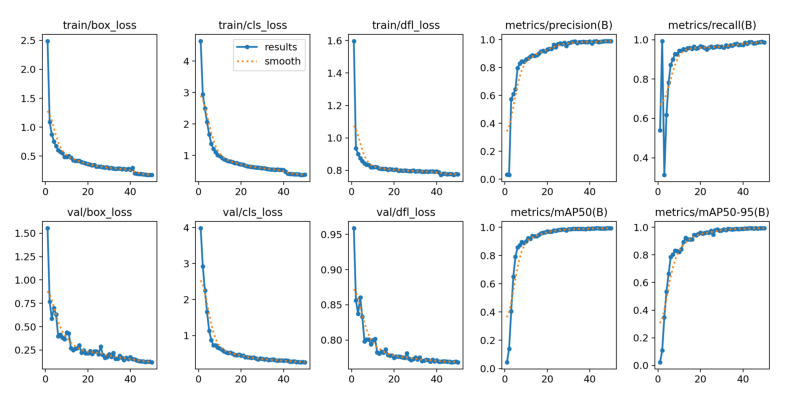

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import the image module

plt.figure(figsize=(10, 5))
# Read the image file into a NumPy array
img = mpimg.imread('runs/detect/train9/results.png')
# Display the image data using imshow
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()

In [ ]:
model = YOLO('runs/detect/train9/weights/best.pt')
metrics = model.val(data='braille.yaml', split='test')

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv5n summary (fused): 84 layers, 2,508,014 parameters, 0 gradients, 7.1 GFLOPs
val: Fast image access ✅ (ping: 1.6±1.7 ms, read: 0.0±0.0 MB/s, size: 4.2 KB)


val: Scanning /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Syntetic/labels/test... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [03:01<00:00,  2.76it/s]


val: New cache created: /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Syntetic/labels/test.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [01:31<00:00,  2.86s/it]


                   all        500       2680      0.988      0.987      0.993      0.993
                     a        193        211      0.998          1      0.995      0.995
                     b         95         95      0.996          1      0.995      0.995
                     c        100        104      0.996          1      0.995      0.995
                     d         72         72      0.986      0.979      0.994      0.994
                     e        286        302      0.995          1      0.995      0.995
                     f         54         62      0.946      0.984      0.994      0.991
                     g         78         78      0.995          1      0.995      0.995
                     h         92         92       0.96          1      0.994      0.994
                     i        162        181      0.997          1      0.995      0.995
                     j         25         25      0.982          1      0.995      0.995
                     

In [ ]:
print("mAP50:", metrics.box.map50)         # mAP@0.5
print("mAP50-95:", metrics.box.map)        # mAP@[.5:.95]
print("Precision:", metrics.box.p)      # Precisión
print("Recall:", metrics.box.r)          # Recall

mAP50: 0.9931824543718578
mAP50-95: 0.993096164328404
Precision: [     0.9985     0.99591     0.99646     0.98601     0.99505     0.94585     0.99489      0.9601     0.99709     0.98238     0.99323     0.99729     0.99364     0.99715     0.99701     0.99523     0.98884     0.94873     0.99605      0.9976     0.99584     0.98871     0.97216     0.99163     0.98568     0.99559]
Recall: [          1           1           1     0.97872           1     0.98387           1           1           1           1           1           1           1           1           1           1           1      0.9951           1           1           1           1     0.71264           1           1           1]


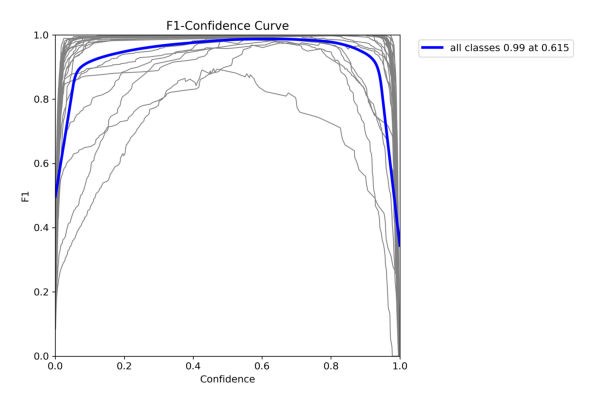

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta a la imagen generada con las métricas
img_path = 'runs/detect/val/F1_curve.png'

# Mostrar la imagen sin ejes
img = mpimg.imread(img_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')  # Quitar ejes
plt.show()


image 1/1 /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Images/Processed/images/test/0001015.jpg: 512x512 1 g, 4 ls, 1 q, 6 ts, 2 ws, 4 ys, 31.0ms
Speed: 4.9ms preprocess, 31.0ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)
Clase: l, Confianza: 0.97, Coordenadas: [122.69400787353516, 288.57781982421875, 208.31985473632812, 415.282958984375]
Clase: y, Confianza: 0.93, Coordenadas: [132.6050567626953, 475.9281005859375, 194.63394165039062, 549.7677001953125]
Clase: l, Confianza: 0.87, Coordenadas: [121.60577392578125, 288.6285095214844, 179.7557373046875, 410.1673889160156]
Clase: l, Confianza: 0.84, Coordenadas: [96.64610290527344, 289.0387268066406, 192.37619018554688, 415.3533935546875]
Clase: t, Confianza: 0.81, Coordenadas: [151.96810913085938, 172.28042602539062, 206.19522094726562, 258.11712646484375]
Clase: y, Confianza: 0.76, Coordenadas: [322.97784423828125, 473.77349853515625, 397.040771484375, 553.6015625]
Clase: t, Confianza: 0.73, Co

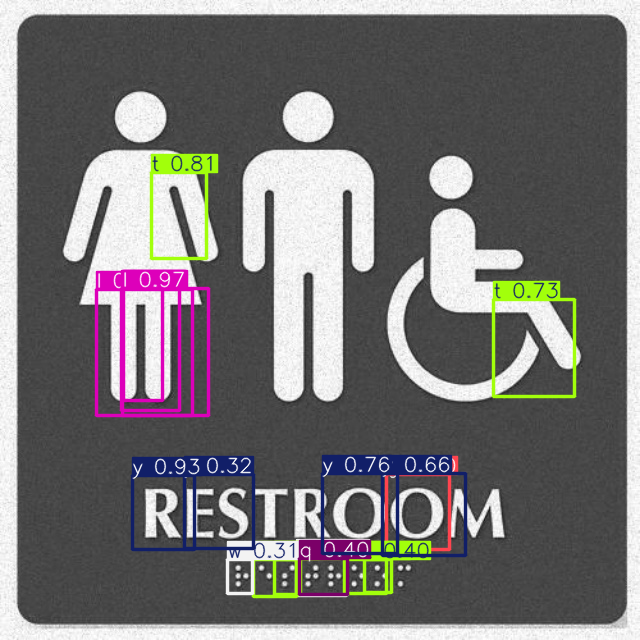

In [ ]:
from ultralytics import YOLO

# Carga tu modelo entrenado (ajusta el path si es necesario)
yolo_ul_entrenado = YOLO('runs/detect/train9/weights/best.pt')

# Haz una predicción sobre una imagen (puedes usar una ruta o una imagen cargada con OpenCV/PIL)
results = yolo_ul_entrenado.predict(source='Braille Images/Processed/images/test/0001015.jpg', save=False, conf=0.25)

# Mostrar resultados en texto
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    coords = box.xyxy[0].tolist()
    print(f"Clase: {results[0].names[cls]}, Confianza: {conf:.2f}, Coordenadas: {coords}")

# Mostrar la imagen directamente desde results
results[0].show()

Clase: l, Confianza: 0.97, Coordenadas: [122.7, 288.6, 208.3, 415.3]
Clase: y, Confianza: 0.93, Coordenadas: [132.6, 475.9, 194.6, 549.8]
Clase: t, Confianza: 0.81, Coordenadas: [152.0, 172.3, 206.2, 258.1]
Clase: y, Confianza: 0.76, Coordenadas: [323.0, 473.8, 397.0, 553.6]
Clase: t, Confianza: 0.73, Coordenadas: [493.1, 299.5, 574.0, 396.0]
Clase: y, Confianza: 0.66, Coordenadas: [382.2, 473.3, 465.3, 555.2]
Clase: q, Confianza: 0.40, Coordenadas: [299.3, 558.4, 347.8, 594.8]
Clase: t, Confianza: 0.40, Coordenadas: [364.5, 559.1, 391.3, 593.0]
Clase: y, Confianza: 0.32, Coordenadas: [184.6, 474.4, 253.9, 548.6]
Clase: t, Confianza: 0.31, Coordenadas: [344.4, 559.1, 386.6, 593.4]
Clase: w, Confianza: 0.31, Coordenadas: [227.3, 559.1, 253.0, 593.7]
Clase: t, Confianza: 0.27, Coordenadas: [253.2, 559.7, 296.0, 596.0]
Clase: t, Confianza: 0.26, Coordenadas: [274.9, 559.3, 300.1, 594.0]
Clase: l, Confianza: 0.26, Coordenadas: [123.6, 288.8, 162.6, 400.1]


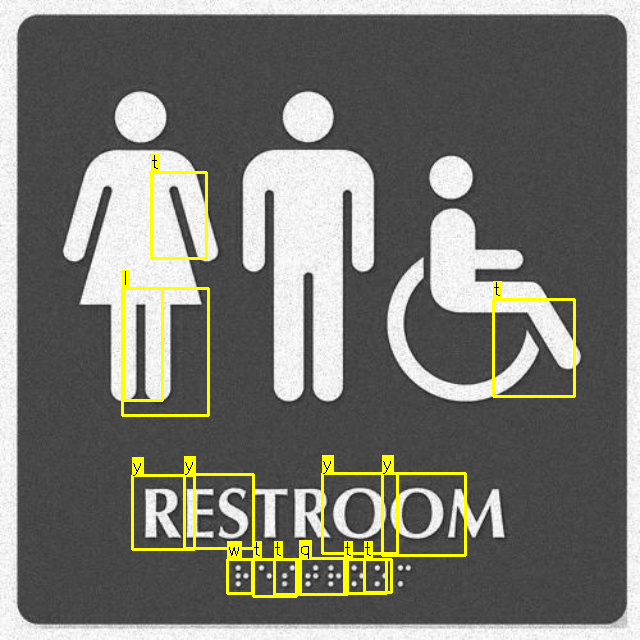

In [ ]:
import cv2
import torch
from torchvision.ops import nms

boxes = results[0].boxes.xyxy
scores = results[0].boxes.conf
classes = results[0].boxes.cls

# Aplicar NMS manualmente con IoU threshold = 0.5
keep = nms(boxes, scores, iou_threshold=0.5)

# Filtrar resultados
filtered_boxes = boxes[keep]
filtered_scores = scores[keep]
filtered_classes = classes[keep]

# Mostrar resultados
for i in range(len(keep)):
    cls = int(filtered_classes[i])
    conf = float(filtered_scores[i])
    x1, y1, x2, y2 = map(float, filtered_boxes[i])
    print(f"Clase: {results[0].names[cls]}, Confianza: {conf:.2f}, Coordenadas: [{x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}]")

image = results[0].orig_img.copy()

# Usa las predicciones filtradas con NMS
for i in range(len(keep)):
    cls = int(filtered_classes[i])
    conf = float(filtered_scores[i])
    x1, y1, x2, y2 = map(int, filtered_boxes[i])
    label = f"{results[0].names[cls]}"

    # Dibujar rectángulo
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Etiqueta con fondo
    (tw, th), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
    cv2.rectangle(image, (x1, y1 - th - 4), (x1 + tw, y1), (0, 255, 255), -1)
    cv2.putText(image, label, (x1, y1 - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

# Mostrar en Colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)

#Los resultados no son los mejores, voy a intentar entrenando la red con las imagenes reales

In [ ]:
%cd '/content/drive/MyDrive/Inteligencia Artificial 2/Proyecto'
print(os.getcwd())

/content
/content/drive/MyDrive/Inteligencia Artificial 2/Proyecto


In [ ]:
from ultralytics import YOLO
# Carga tu modelo entrenado (ajusta el path si es necesario)
yolo_syntetic_trained = YOLO('runs/detect/train9/weights/best.pt')
yolo_syntetic_trained.train(data="braille_real.yaml", epochs=50, imgsz=640, batch=2, name='braille_real_trained')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=braille_real.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=

100%|██████████| 755k/755k [00:00<00:00, 92.8MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

YOLOv5n summary: 153 layers, 2,513,534 parameters, 2,513,518 gradients, 7.2 GFLOPs

Transferred 427/427 items from pretrained weights
Freezing layer 'model.24.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 13.0±28.8 MB/s, size: 85.3 KB)


train: Scanning /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Images/Processed/labels/train.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.1 MB/s, size: 107.4 KB)


val: Scanning /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Images/Processed/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to runs/detect/braille_real_trained/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/braille_real_trained
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.336G      2.237      3.827       1.49         14        640: 100%|██████████| 67/67 [00:09<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]

                   all         30        223      0.412      0.194        0.2      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.348G      1.942      3.349      1.391          8        640: 100%|██████████| 67/67 [00:07<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.72it/s]

                   all         30        223      0.512        0.3      0.325      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      0.35G      1.886      3.078      1.289          9        640: 100%|██████████| 67/67 [00:06<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.91it/s]


                   all         30        223      0.543      0.345      0.376      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.363G       1.78       2.91      1.206         33        640: 100%|██████████| 67/67 [00:07<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all         30        223      0.495      0.351      0.403      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.379G      1.717      2.702      1.207          6        640: 100%|██████████| 67/67 [00:08<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.80it/s]

                   all         30        223       0.51       0.31      0.399      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.393G       1.62      2.558       1.21          5        640: 100%|██████████| 67/67 [00:06<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.92it/s]

                   all         30        223      0.541      0.372        0.4      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.406G       1.65      2.756      1.195          4        640: 100%|██████████| 67/67 [00:07<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.73it/s]


                   all         30        223      0.612      0.326      0.412      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.422G      1.633      2.512      1.207          3        640: 100%|██████████| 67/67 [00:06<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.30it/s]


                   all         30        223      0.531      0.438       0.44       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.436G      1.646      2.536       1.19         17        640: 100%|██████████| 67/67 [00:06<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.24it/s]

                   all         30        223      0.706      0.388      0.473      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.449G      1.615      2.606      1.167         19        640: 100%|██████████| 67/67 [00:07<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.22it/s]


                   all         30        223      0.604      0.426      0.476      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.449G      1.583      2.303       1.15          4        640: 100%|██████████| 67/67 [00:06<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.56it/s]

                   all         30        223      0.653      0.382      0.486      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.449G      1.606       2.27      1.109          9        640: 100%|██████████| 67/67 [00:08<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 13.15it/s]

                   all         30        223      0.573      0.423      0.528      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.449G      1.603      2.328      1.164         32        640: 100%|██████████| 67/67 [00:05<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.55it/s]

                   all         30        223      0.786      0.398      0.548      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.463G      1.523      2.085      1.135          5        640: 100%|██████████| 67/67 [00:08<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.15it/s]

                   all         30        223      0.718      0.441      0.552      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.463G      1.507       2.05      1.129          6        640: 100%|██████████| 67/67 [00:06<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]


                   all         30        223       0.75      0.468      0.558      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.463G      1.509      2.082      1.122         11        640: 100%|██████████| 67/67 [00:06<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.45it/s]

                   all         30        223       0.67      0.497      0.558      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.463G      1.519      2.045      1.128         18        640: 100%|██████████| 67/67 [00:09<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.78it/s]

                   all         30        223      0.583      0.579       0.58      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.479G      1.507      1.911      1.137          2        640: 100%|██████████| 67/67 [00:06<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.11it/s]

                   all         30        223      0.571      0.568      0.594      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.479G      1.465      1.953       1.12          8        640: 100%|██████████| 67/67 [00:07<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.94it/s]

                   all         30        223      0.683      0.491      0.584       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.492G       1.47      1.948      1.094         11        640: 100%|██████████| 67/67 [00:06<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.83it/s]

                   all         30        223      0.703      0.488       0.58      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.492G      1.485      1.982      1.124          4        640: 100%|██████████| 67/67 [00:07<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.36it/s]

                   all         30        223       0.68      0.465      0.546      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.492G      1.464      1.915       1.12          4        640: 100%|██████████| 67/67 [00:06<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.29it/s]


                   all         30        223      0.609      0.498      0.588       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.492G      1.423      1.783       1.09         19        640: 100%|██████████| 67/67 [00:06<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.14it/s]

                   all         30        223      0.692      0.489      0.613      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.492G      1.446      1.934      1.122          6        640: 100%|██████████| 67/67 [00:07<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.82it/s]


                   all         30        223      0.582      0.577      0.631      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.514G      1.447      1.798      1.115          7        640: 100%|██████████| 67/67 [00:06<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.36it/s]

                   all         30        223      0.623      0.596      0.637      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.514G      1.385      2.039      1.069         31        640: 100%|██████████| 67/67 [00:07<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.85it/s]

                   all         30        223      0.609      0.593      0.659       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.514G      1.451      1.883      1.136         34        640: 100%|██████████| 67/67 [00:06<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.05it/s]

                   all         30        223      0.654      0.565      0.634      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.514G      1.442      1.865      1.112         22        640: 100%|██████████| 67/67 [00:07<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.93it/s]

                   all         30        223      0.723      0.484      0.647      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.514G      1.427      1.737      1.095         10        640: 100%|██████████| 67/67 [00:05<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.18it/s]

                   all         30        223      0.734      0.495       0.65       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.514G      1.362      1.666       1.08          7        640: 100%|██████████| 67/67 [00:07<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.62it/s]

                   all         30        223      0.719      0.505      0.625      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.514G      1.403      1.969      1.081          4        640: 100%|██████████| 67/67 [00:05<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 12.21it/s]

                   all         30        223      0.732      0.502      0.626      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.514G      1.381      1.646      1.068         35        640: 100%|██████████| 67/67 [00:07<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.25it/s]

                   all         30        223      0.722       0.51      0.647      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.514G       1.36      1.676      1.068          3        640: 100%|██████████| 67/67 [00:06<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.71it/s]

                   all         30        223      0.615       0.56       0.65      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.514G      1.397      1.691       1.09         10        640: 100%|██████████| 67/67 [00:06<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.39it/s]

                   all         30        223      0.678      0.519      0.659      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.514G      1.422      1.745      1.083         16        640: 100%|██████████| 67/67 [00:07<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.92it/s]

                   all         30        223      0.652      0.569      0.665      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.514G        1.4      1.817      1.103         28        640: 100%|██████████| 67/67 [00:06<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.92it/s]

                   all         30        223      0.704      0.556      0.663       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.514G      1.304      1.811      1.021          9        640: 100%|██████████| 67/67 [00:07<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.86it/s]

                   all         30        223      0.659      0.566      0.667      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.514G      1.415      1.759        1.1         13        640: 100%|██████████| 67/67 [00:06<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.21it/s]

                   all         30        223      0.646      0.587      0.671      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.514G      1.395      1.611      1.075         22        640: 100%|██████████| 67/67 [00:07<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.21it/s]

                   all         30        223      0.508      0.711      0.675      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.514G      1.334       1.95      1.031          3        640: 100%|██████████| 67/67 [00:05<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.53it/s]

                   all         30        223      0.638      0.581      0.678      0.445


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.514G      1.299      1.442      1.076          6        640: 100%|██████████| 67/67 [00:07<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.07it/s]

                   all         30        223      0.523      0.663      0.686      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.514G      1.357      1.465      1.062          8        640: 100%|██████████| 67/67 [00:06<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 12.00it/s]

                   all         30        223      0.487      0.724      0.681      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.514G      1.385      1.552      1.053          4        640: 100%|██████████| 67/67 [00:06<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.97it/s]

                   all         30        223      0.485       0.71      0.682      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.527G      1.309       1.45      1.066          8        640: 100%|██████████| 67/67 [00:06<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.38it/s]


                   all         30        223       0.64      0.582      0.678      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.527G      1.308      1.463      1.049          5        640: 100%|██████████| 67/67 [00:06<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.54it/s]

                   all         30        223      0.471      0.664      0.672      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.527G      1.307      1.433      1.047          3        640: 100%|██████████| 67/67 [00:08<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.35it/s]

                   all         30        223      0.647      0.562      0.669       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.527G      1.308      1.465      1.051          7        640: 100%|██████████| 67/67 [00:05<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.43it/s]

                   all         30        223      0.719      0.518      0.669      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.527G      1.342      1.439      1.058          4        640: 100%|██████████| 67/67 [00:07<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 16.57it/s]

                   all         30        223      0.645      0.565      0.668      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.527G      1.347      1.415      1.066          6        640: 100%|██████████| 67/67 [00:06<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 17.07it/s]

                   all         30        223      0.674      0.532      0.668      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.527G      1.315      1.371      1.035          7        640: 100%|██████████| 67/67 [00:07<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.81it/s]

                   all         30        223      0.658      0.525      0.658      0.432



50 epochs completed in 0.114 hours.
Optimizer stripped from runs/detect/braille_real_trained/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/braille_real_trained/weights/best.pt, 5.3MB

Validating runs/detect/braille_real_trained/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 84 layers, 2,508,014 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.32it/s]


                   all         30        223      0.486      0.708      0.682       0.45
                     a         13         20      0.556          1      0.899      0.562
                     b          7          7      0.376       0.69      0.645      0.389
                     c          7          7      0.715          1      0.995      0.669
                     d          7          9      0.722      0.866      0.756       0.53
                     e         19         43      0.714      0.721      0.751      0.439
                     f          3          3          0          0       0.23       0.15
                     g          2          2      0.565        0.5      0.497      0.298
                     h          6          6      0.412      0.354      0.588       0.29
                     i          7          8      0.184      0.375      0.423      0.278
                     j          1          1       0.86          1      0.995      0.796
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b25e3e2d090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.0420

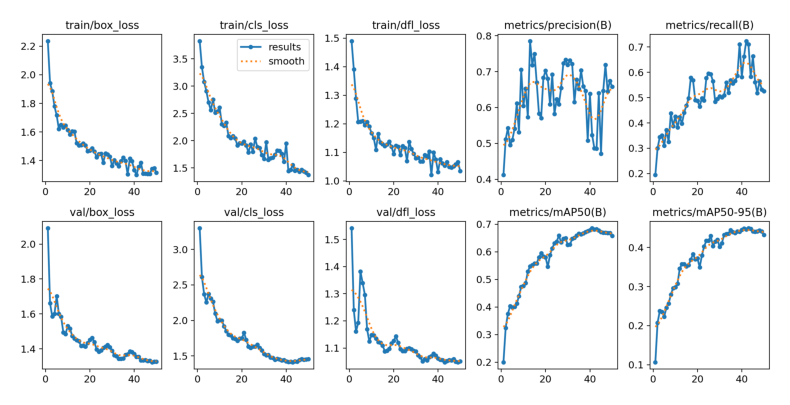

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import the image module

plt.figure(figsize=(10, 5))
# Read the image file into a NumPy array
img = mpimg.imread('runs/detect/braille_real_trained/results.png')
# Display the image data using imshow
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()


image 1/1 /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Images/Processed/images/test/0001916.jpg: 640x640 1 a, 1 h, 1 l, 1 n, 2 os, 1 r, 1 t, 1 u, 1 v, 2 ys, 466.2ms
Speed: 6.4ms preprocess, 466.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Clase: o, Confianza: 0.97, Coordenadas: [324.23577880859375, 337.66705322265625, 345.65216064453125, 368.74273681640625]
Clase: y, Confianza: 0.96, Coordenadas: [301.29193115234375, 337.96929931640625, 322.95745849609375, 369.89813232421875]
Clase: v, Confianza: 0.83, Coordenadas: [392.3782653808594, 335.6688232421875, 422.2395324707031, 371.7156982421875]
Clase: u, Confianza: 0.79, Coordenadas: [347.28326416015625, 337.41845703125, 371.11883544921875, 370.286865234375]
Clase: r, Confianza: 0.74, Coordenadas: [451.66497802734375, 334.87921142578125, 472.92437744140625, 367.57989501953125]
Clase: t, Confianza: 0.74, Coordenadas: [149.59521484375, 340.0426025390625, 170.41036987304688, 370.6588134765625]
Cla

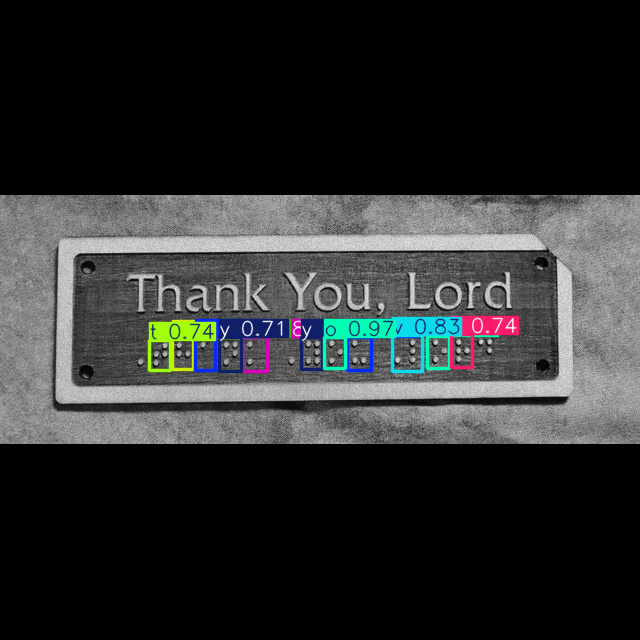

In [11]:
from ultralytics import YOLO

# Carga tu modelo entrenado (ajusta el path si es necesario)
yolo_real_trained = YOLO('runs/detect/braille_real_trained/weights/best.pt')

# Haz una predicción sobre una imagen (puedes usar una ruta o una imagen cargada con OpenCV/PIL)
results = yolo_real_trained.predict(source='Braille Images/Processed/images/test/0001916.jpg', save=False, conf=0.25)

# Mostrar resultados en texto
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    coords = box.xyxy[0].tolist()
    print(f"Clase: {results[0].names[cls]}, Confianza: {conf:.2f}, Coordenadas: {coords}")

# Mostrar la imagen directamente desde results
results[0].show()

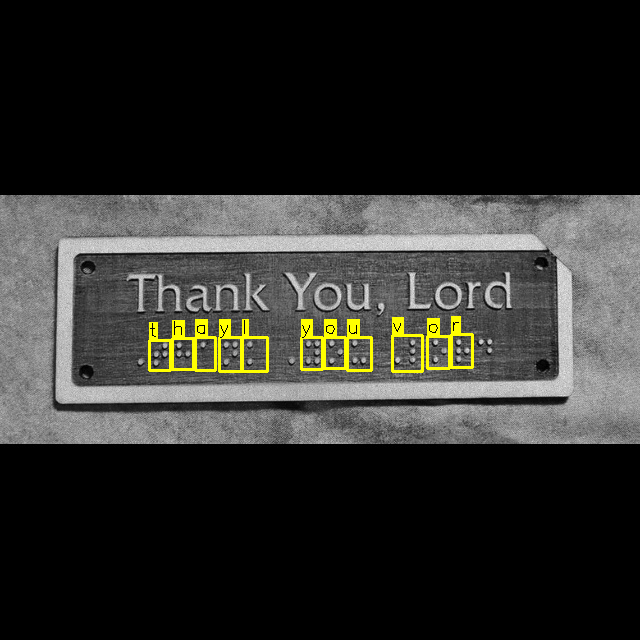

In [12]:
import cv2
import torch
from torchvision.ops import nms

boxes = results[0].boxes.xyxy
scores = results[0].boxes.conf
classes = results[0].boxes.cls

# Aplicar NMS manualmente con IoU
keep = nms(boxes, scores, iou_threshold=0.3)

# Filtrar resultados
filtered_boxes = boxes[keep]
filtered_scores = scores[keep]
filtered_classes = classes[keep]

image = results[0].orig_img.copy()

# Usa las predicciones filtradas con NMS
for i in range(len(keep)):
    cls = int(filtered_classes[i])
    conf = float(filtered_scores[i])
    x1, y1, x2, y2 = map(int, filtered_boxes[i])
    label = f"{results[0].names[cls]}"

    # Dibujar rectángulo
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Etiqueta con fondo
    (tw, th), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
    cv2.rectangle(image, (x1, y1 - th - 4), (x1 + tw, y1), (0, 255, 255), -1)
    cv2.putText(image, label, (x1, y1 - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

# Mostrar en Colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [13]:
import cv2
import torch
from torchvision.ops import nms
from collections import defaultdict

# Agrupar por líneas (por y1)
line_groups = defaultdict(list)
x1, y1, x2, y2 = filtered_boxes[1].tolist()
y_threshold = np.abs(y1-y2) # tolerancia vertical en píxeles (ajusta según tamaño de texto)

# Agrupar letras por líneas
for i in range(len(keep)):
    cls = int(filtered_classes[i])
    letra = results[0].names[cls]
    x1, y1, x2, y2 = filtered_boxes[i].tolist()
    y_center = (y1 + y2) / 2

    # Asignar a una línea existente o crear una nueva
    added = False
    for key in line_groups:
        if abs(key - y_center) < y_threshold:
            line_groups[key].append((x1, letra))
            added = True
            break
    if not added:
        line_groups[y_center].append((x1, letra))

# Ordenar líneas verticalmente (de arriba hacia abajo)
sorted_lines = sorted(line_groups.items(), key=lambda x: x[0])

# Construir texto
texto_final = []
for _, letras in sorted_lines:
    letras.sort(key=lambda x: x[0])  # ordenar letras por x

    # Calcular distancia promedio entre letras (sin outliers)
    x_coords = [x for x, _ in letras]
    dists = [x_coords[i+1] - x_coords[i] for i in range(len(x_coords)-1)]
    if len(dists) > 0:
        avg_dist = sum(dists) / len(dists)
    else:
        avg_dist = 0
    space_threshold = avg_dist * 1.2  # ajustable

    # Construir línea con espacios
    linea = letras[0][1]
    for i in range(1, len(letras)):
        gap = letras[i][0] - letras[i-1][0]
        if gap > space_threshold:
            linea += ' '  # espacio entre palabras
        linea += letras[i][1]

    texto_final.append(linea)

# Imprimir
print("Texto reconocido:")
for linea in texto_final:
    print(linea)

Texto reconocido:
thayl you vor


In [ ]:
# Carga tu modelo entrenado (ajusta el path si es necesario)
yolo_real_trained = YOLO('runs/detect/braille_real_trained/weights/best.pt')
metrics = yolo_real_trained.val(data='braille_real.yaml', split='test')

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 84 layers, 2,508,014 parameters, 0 gradients, 7.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 54.6±121.7 MB/s, size: 287.6 KB)


val: Scanning /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Images/Processed/labels/test... 30 images, 1 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:38<00:00,  1.24s/it]

val: New cache created: /content/drive/MyDrive/Inteligencia Artificial 2/Proyecto/Braille Images/Processed/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]


                   all         31        210      0.681      0.639      0.715      0.508
                     a         13         18      0.975      0.889      0.975      0.551
                     b          4          4      0.899       0.75      0.766      0.635
                     c          4          5          1      0.469      0.866      0.551
                     d          9          9      0.646      0.667      0.732      0.525
                     e         22         24      0.774      0.792      0.898      0.605
                     f          2          2          0          0      0.105     0.0684
                     g          6          9      0.982      0.556      0.709      0.512
                     h          7          7      0.814      0.633      0.741      0.526
                     i          9         11       0.77      0.364      0.646      0.449
                     j          1          1          1          0      0.199      0.159
                     

In [ ]:
print("mAP50:", metrics.box.map50)         # mAP@0.5
print("mAP50-95:", metrics.box.map)        # mAP@[.5:.95]
print("Precision:", metrics.box.p)      # Precisión
print("Recall:", metrics.box.r)          # Recall

mAP50: 0.7145047577074372
mAP50-95: 0.5082695300277696
Precision: [    0.97477     0.89948           1     0.64599     0.77387           0     0.98169     0.81428     0.76954           1           0     0.64757     0.56189     0.59386     0.72735     0.77264     0.73966     0.75478     0.88223     0.79021     0.68813           0     0.71436     0.60947]
Recall: [    0.88889        0.75     0.46913     0.66667     0.79167           0     0.55556     0.63264     0.36364           0           0     0.86667        0.75         0.9        0.88     0.86319     0.70588       0.875     0.75202     0.63402           1           0           1           1]


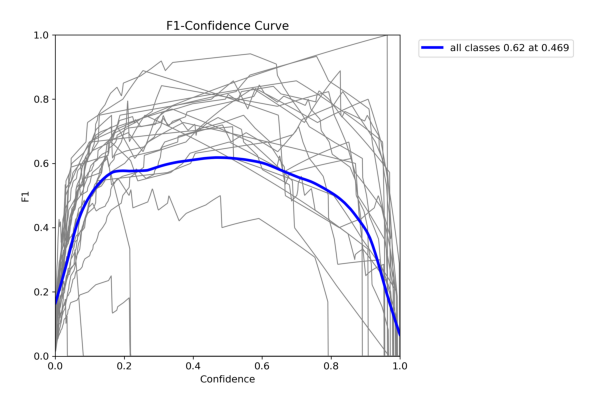

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta a la imagen generada con las métricas
img_path = 'runs/detect/val_trained/F1_curve.png'

# Mostrar la imagen sin ejes
img = mpimg.imread(img_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')  # Quitar ejes
plt.show()